### Common Activation Functions

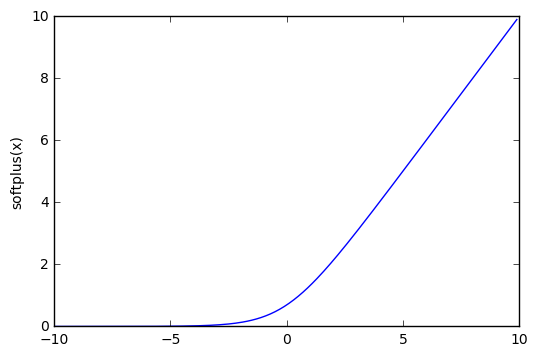

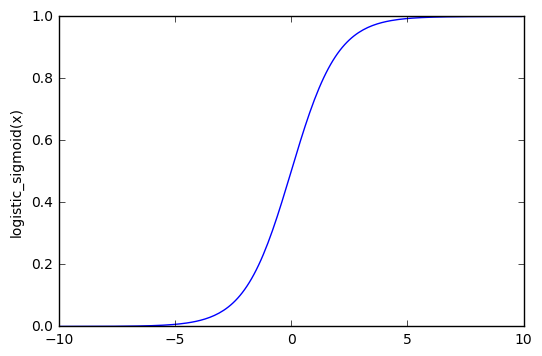

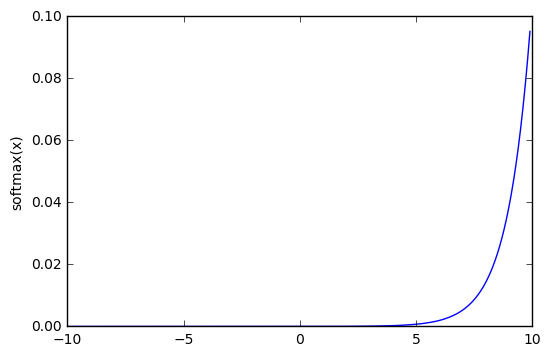

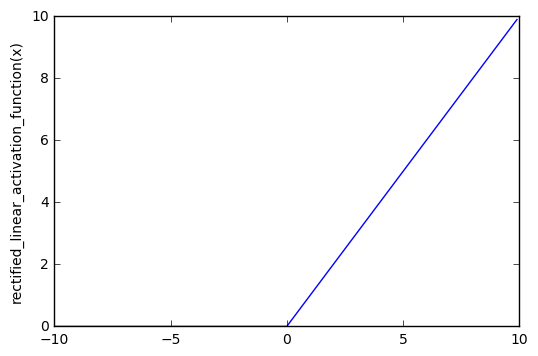

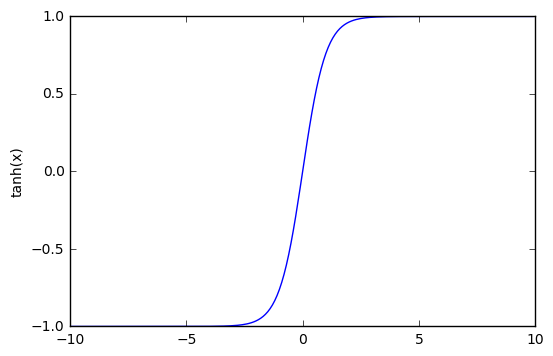

In [3]:
import numpy as np
from math import tanh
from matplotlib import pyplot as plt
i = np.arange(-10, 10, .1)

def softplus(x):
    return np.log(1 + np.exp(x))

plt.plot(i, softplus(i))
plt.ylabel('softplus(x)')
plt.show()

def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(i, logistic_sigmoid(i))
plt.ylabel('logistic_sigmoid(x)')
plt.show()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

plt.plot(i, softmax(i))
plt.ylabel('softmax(x)')
plt.show()

def rectified_linear_activation_function(z):
    return max([0, z])

plt.plot(i, list(map(rectified_linear_activation_function, i)))
plt.ylabel('rectified_linear_activation_function(x)')
plt.show()

plt.plot(i, list(map(tanh, i)))
plt.ylabel('tanh(x)')
plt.show()



### XOR as a Neural Network in Numpy, Keras (TensorFlow), TensorFlow, and PyTorch

XOR with Numpy

In [8]:
import numpy as np

X = np.matrix([[0, 0],
               [0, 1],
               [1, 0],
               [1, 1]])
W = np.matrix([[1, 1],
               [1, 1]])
c = np.array([0, -1])
w = np.matrix([[1],
               [-2]])

A_in = (X * W + c)
A_out = np.matrix([list(rectified_linear_activation_function(y) for y in x) for x in A_in.tolist()])
A_out * w

matrix([[0],
        [1],
        [1],
        [0]])

XOR with Keras

In [9]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.core.Dense(2, activation='relu', input_shape=(2,)))
model.add(keras.layers.core.Dense(1)) # linear is the default activation (https://keras.io/activations/)
model.set_weights([
    np.array([[1 , 1], [1,  1]]),
    np.array([ 0, -1]),
    np.array([[1], [-2]]),
    np.array([ 0])
])
model.predict_classes(X)

4/4 [==============================] - 0s


array([[0],
       [1],
       [1],
       [0]], dtype=int32)

XOR with TensorFlow

In [10]:
import tensorflow as tf

tfX = tf.constant(X, dtype='float64')
tfW = tf.Variable(W, dtype='float64')
tfc = tf.Variable(c, dtype='float64')
tfw = tf.Variable(w, dtype='float64')

node1 = tf.matmul(tfX, tfW)
node2 = tf.add(node1, tfc)
node3 = tf.nn.relu(node2)
node4 = tf.matmul(node3, tfw)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(node4)

array([[ 0.],
       [ 1.],
       [ 1.],
       [ 0.]])

XOR with PyTorch

In [11]:
from torch import Tensor
from torch.autograd import Variable
from torch.nn import Module, Linear, Parameter 
from torch.nn.functional import relu

class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = Linear(2, 2)
        self.fc2 = Linear(2, 1)
    def forward(self, x):
        x = relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

net.fc1.weight = Parameter(Tensor([[1, 1],
                                   [1, 1]]))
net.fc1.bias = Parameter(Tensor([[0, -1]]))
net.fc2.weight = Parameter(Tensor([[1, -2]]))
net.fc2.bias = Parameter(Tensor([[0]]))

input = Variable(Tensor([[0, 0],
                         [0, 1],
                         [1, 0],
                         [1, 1]]))
out = net(input)
out

Variable containing:
 0
 1
 1
 0
[torch.FloatTensor of size 4x1]

## Neural Network w/ Loss Function, Gradient, and Optimization defined with Sympy

In [12]:
import numpy as np
import sympy

x_data = np.array([1, 2, 3])
y_data = np.array([2, 4, 6])

x, y, w, y_pred = sympy.symbols('x y w y_pred')
y_pred = x * w
print('forward:', y_pred)
loss = (y_pred - y)**2
print('loss:', loss)
gradient = sympy.diff(loss, w)
print('gradient:', gradient)

w_in = np.random.randint(0,3)
print('w:', w_in)
learning_rate = 0.01
print('learning_rate:', learning_rate, '\n')
for epoch in range(10):
    for x_in, y_in in zip(x_data, y_data):
        print('x:', x_in, 'y:', y_in, 'w:', w_in)
        grad = gradient.evalf(subs={x: x_in, y: y_in, w: w_in})
        print('gradient:', grad)
        w_in = w_in - learning_rate * grad
        l = loss.evalf(subs={x: x_in, y: y_in, w: w_in})
    print('loss:', l, '\n')

forward: w*x
loss: (w*x - y)**2
gradient: 2*x*(w*x - y)
w: 2
learning_rate: 0.01 

x: 1 y: 2 w: 2
gradient: 0.e-141
x: 2 y: 4 w: 2.00000000000000
gradient: 0.e-140
x: 3 y: 6 w: 2.00000000000000
gradient: 0.e-140
loss: 4.62129760221396e-274 

x: 1 y: 2 w: 2.00000000000000
gradient: 0.e-141
x: 2 y: 4 w: 2.00000000000000
gradient: 0.e-140
x: 3 y: 6 w: 2.00000000000000
gradient: 0.e-140
loss: 4.62129760221396e-274 

x: 1 y: 2 w: 2.00000000000000
gradient: 0.e-141
x: 2 y: 4 w: 2.00000000000000
gradient: 0.e-140
x: 3 y: 6 w: 2.00000000000000
gradient: 0.e-140
loss: 4.62129760221396e-274 

x: 1 y: 2 w: 2.00000000000000
gradient: 0.e-141
x: 2 y: 4 w: 2.00000000000000
gradient: 0.e-140
x: 3 y: 6 w: 2.00000000000000
gradient: 0.e-140
loss: 4.62129760221396e-274 

x: 1 y: 2 w: 2.00000000000000
gradient: 0.e-141
x: 2 y: 4 w: 2.00000000000000
gradient: 0.e-140
x: 3 y: 6 w: 2.00000000000000
gradient: 0.e-140
loss: 4.62129760221396e-274 

x: 1 y: 2 w: 2.00000000000000
gradient: 0.e-141
x: 2 y: 4 w: 2